# Lesson 2: sMRI preprocessing - image cleanup

## Objectives
- Visualize structural MR images (NifTi)

## Python Requirements
- [matplotlib](https://matplotlib.org/)
- [nibabel](https://nipy.org/nibabel/)
- [nilearn](https://nilearn.github.io/index.html)
- [nipype](https://nipype.readthedocs.io/en/0.11.0/index.html) (Optional)

## Useful resources:
- FreeSurfer output [description](https://surfer.nmr.mgh.harvard.edu/fswiki/ReconAllTableStableV5.3)
- Nipype [snippets](https://miykael.github.io/nipype_tutorial/): 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nibabel as nib
import nilearn
from nilearn import datasets
from nilearn import plotting
import os

## Local paths

In [2]:
local_data_dir = '../local_data/'
subject_dir = local_data_dir + '2_sMRI_cleanup/sub001/mri/'

## Clean-up tasks:
- Bias correction (intensity normalization)
- Brain extraction 

### If you want to run the preprocessing tasks, you will need ANTs and Nipype on your machine. These tasks are computationally demanding so we can skip them at the moment. But you can use the code snippets to try them later! 


## [Bias correction](https://pythonhosted.org/nipype/interfaces/generated/nipype.interfaces.ants.segmentation.html#n4biasfieldcorrection)
- _Uncomment lines below when you have the ANTs + nipype setup ready!_

In [3]:
# import nipype.pipeline.engine as pe                       
# from nipype.interfaces.utility import IdentityInterface
# from nipype.interfaces.ants import N4BiasFieldCorrection
# from nipype.interfaces.io import SelectFiles, DataSink


# my_brain_image = '/path/to/T1.nii.gz'

# n4 = N4BiasFieldCorrection()
# n4.inputs.dimension = 3
# n4.inputs.input_image = my_brain_image
# n4.inputs.bspline_fitting_distance = 300
# n4.inputs.shrink_factor = 3
# n4.inputs.n_iterations = [50,50,30,20]
# n4.inputs.output_image = my_brain_image.replace('.nii.gz', '_N4_corrected_nii.gz')

# n4.run() 

## Compare the original and corrected images

### The example uses Nipype tutorial data and FreeSurfer intermediate outputs

### Files used:
- orig.mgz: input (raw) T1 image
- nu.mgz: [Output](https://surfer.nmr.mgh.harvard.edu/fswiki/nuintensitycor) of non-parametric Non-uniform intensity Normalization (N3)
- T1.mgz: [Output](https://surfer.nmr.mgh.harvard.edu/fswiki/normalization) of intensity normalization of the orig volume to correct for fluctuations in intensity that would otherwise make intensity-based segmentation much more difficult. Intensities for all voxels are scaled so that the mean intensity of the white matter is 110.


In [4]:
T1_orig = subject_dir + 'orig.mgz'
T1_corrected = subject_dir + 'nu.mgz'
T1_normalized = subject_dir + 'T1.mgz'

T1_img_orig = nib.load(T1_orig)
T1_img_corrected = nib.load(T1_corrected)
T1_img_normalized = nib.load(T1_normalized)

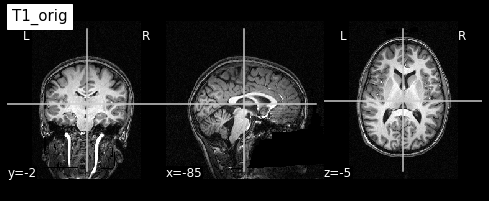

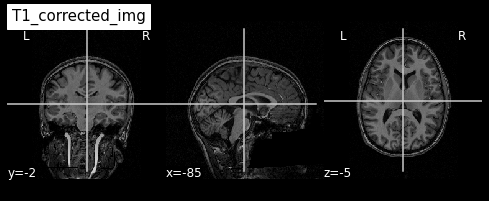

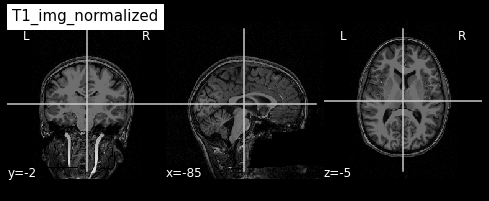

In [5]:
cut_coords = (-85,-2,-5)
plotting.plot_anat(T1_orig, title="T1_orig", cut_coords=cut_coords, vmax=255)
plotting.plot_anat(T1_corrected, title="T1_corrected_img", cut_coords=cut_coords, vmax=255)
plotting.plot_anat(T1_img_normalized, title="T1_img_normalized", cut_coords=cut_coords, vmax=255)

## plot intensity histogram

In [6]:
T1_data_orig = T1_img_orig.get_fdata()
T1_data_corrected = T1_img_corrected.get_fdata()
T1_data_normalized = T1_img_normalized.get_fdata()

print("Data shapes, orig: {}, corrected: {}, normalized: {}".format(T1_data_orig.shape, T1_data_corrected.shape, T1_data_normalized.shape))

print("Intensity ranges, orig, min:{}, max:{}, corrected, min:{}, max:{},  normalized, min:{}, max:{}".format(T1_data_orig.min(), T1_data_orig.max(), T1_data_corrected.min(), T1_data_corrected.max(), T1_data_normalized.min(), T1_data_normalized.max()))

# non_zero
T1_data_orig = T1_data_orig.ravel()
T1_data_orig = T1_data_orig[np.nonzero(T1_data_orig)]

T1_data_corrected = T1_data_corrected.ravel()
T1_data_corrected = T1_data_corrected[np.nonzero(T1_data_corrected)]

T1_data_normalized = T1_data_normalized.ravel()
T1_data_normalized = T1_data_normalized[np.nonzero(T1_data_normalized)]


Data shapes, orig: (256, 256, 256), corrected: (256, 256, 256), normalized: (256, 256, 256)
Intensity ranges, orig, min:0.0, max:255.0, corrected, min:0.0, max:206.0,  normalized, min:0.0, max:224.0


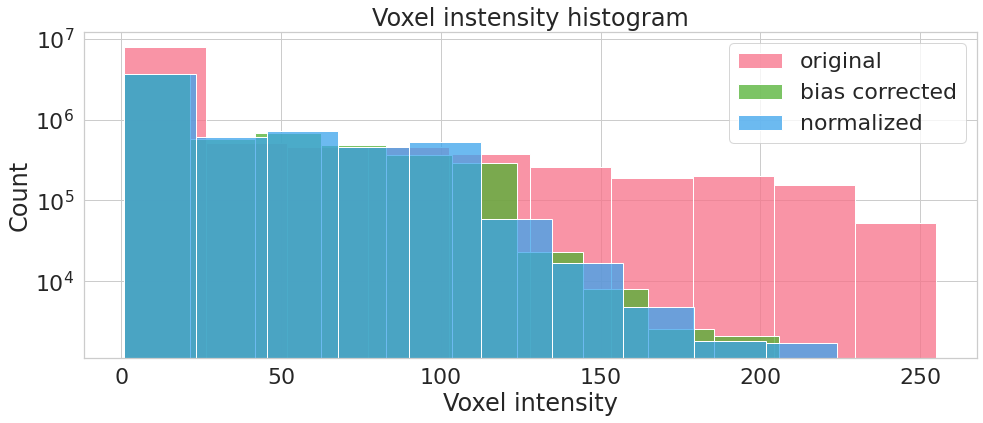

In [7]:
sns.set_context("notebook", font_scale=2, rc={"lines.linewidth": 2.5})

palette = sns.color_palette("husl", 3)

with sns.axes_style("whitegrid"):
    plt.figure(figsize=(16, 6))
    g = sns.histplot(T1_data_orig, bins=10, kde=False, color=palette[0], log_scale=(False, True), label='original')
    g = sns.histplot(T1_data_corrected,bins=10, kde=False, color=palette[1], log_scale=(False, True), label='bias corrected')
    g = sns.histplot(T1_data_normalized,bins=10, kde=False, color=palette[2], log_scale=(False, True), label='normalized')

    plt.legend()
    plt.xlabel('Voxel intensity')
    plt.title('Voxel instensity histogram')

## [Brain extraction](https://pythonhosted.org/nipype/interfaces/generated/nipype.interfaces.ants.segmentation.html#brainextraction)
- _Uncomment lines below when you have the ANTs + nipype setup ready!_


In [8]:
# from nipype.interfaces.ants.segmentation import BrainExtraction
# brainextraction = BrainExtraction()
# brainextraction.inputs.dimension = 3
# brainextraction.inputs.anatomical_image ='T1.nii.gz'
# brainextraction.inputs.brain_template = 'study_template.nii.gz'
# brainextraction.inputs.brain_probability_mask ='ProbabilityMaskOfStudyTemplate.nii.gz'
# print(brainextraction.cmdline)

##'antsBrainExtraction.sh -a T1.nii.gz -m ProbabilityMaskOfStudyTemplate.nii.gz -e study_template.nii.gz -d 3 -s nii.gz -o highres001_''antsBrainExtraction.sh -a T1.nii.gz -m Probabi


## Compare the original and brain extracted images
### The example uses Nipype tutorial data and FreeSurfer intermediate outputs

### Files used:
- T1.mgz: Normalized MR image
- brainmask.mgz: brain extracted (i.e. skull stripped MR image)

In [9]:
T1_normalized = subject_dir + 'T1.mgz'
T1_brain_extract = subject_dir + 'brainmask.mgz'

T1_img_normalized = nib.load(T1_normalized)
T1_img_brain_extract = nib.load(T1_brain_extract)

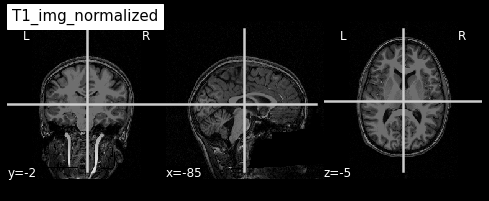

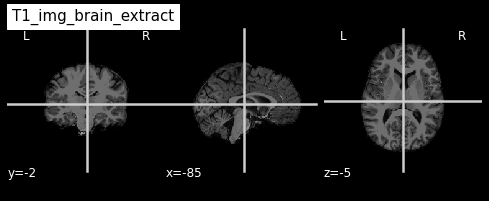

In [10]:
cut_coords = (-85,-2,-5)

plotting.plot_anat(T1_img_normalized, title="T1_img_normalized", cut_coords=cut_coords, vmax=255)
plotting.plot_anat(T1_img_brain_extract, title="T1_img_brain_extract", cut_coords=cut_coords, vmax=255)